# Machine Learning - Assignment 1
Ling Fei Zhang, Brandon Ma, Giordano Di Marzio

In [439]:
#imports
import matplotlib.colors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import io
import urllib.request
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import warnings
from tabulate import tabulate
from matplotlib.colors import ListedColormap
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import metrics

# **Data Cleanup**

## **Load the datasets**

Load in the datasets and clean them from missing values

In [440]:
hepatitis_names = ["Class", "Age", "Sex", "Steroid", "Antivirals", "Fatigue", "Malaise", "Anorexia", "Liver Big", "Liver Firm", "Spleen Palpable", "Spiders", "Ascites", "Varices", "Bilirubin", "Alk Phosphate", "Sgot", "Albumin", "Protime", "Histology"]
data1 = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data", names=hepatitis_names)
total_sample1 = data1.shape[0]
data1 = data1[~data1.eq("?").any(1)].reset_index(drop=True)
print("data1 has {0} many rows and {1} features\n".format(data1.shape[0], data1.shape[1]))

messidor_features_names = ["Quality", "Pre-Screen", "Number of MA1", "Number of MA2", "Number of MA3", "Number of MA4", "Number of MA5", "Number of MA6", "Exudate1", "Exudate2", "Exudate3", "Exudate4","Exudate5", "Exudate6", "Exudate7", "Exudate8", "Distance", "Diameter", "AM/FM", "Class"]
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff"
stream = urllib.request.urlopen(url2)
data2, meta = arff.loadarff(io.StringIO(stream.read().decode('utf-8')))
data2 = pd.DataFrame(data2)
data2.columns = messidor_features_names
total_sample2 = data2.shape[0]
data2 = data2[~data2.eq("?").any(1)].reset_index(drop=True)
print("data2 has {0} many rows and {1} features\n".format(data2.shape[0], data2.shape[1]))



data1 has 80 many rows and 20 features

data2 has 1151 many rows and 20 features



Below is a function that converts the values of the dataset to floats. This is done in order to compare values between one another.

In [441]:
def convert(data):
    col = data.columns
    for c in col:
        data[c] = data[c].dropna().astype(float)
    return data

data1 = convert(data1)
data2 = convert(data2)

#change the class label of data1 to be 0 and 1 instead of 1 and 2
data1["Class"] = data1["Class"] - 1

## **Basic statistics of datasets**

Below is a function that computes the basic statistics of the datasets.

In [442]:
def basic_stats(data):
    col = data.columns
    classification = data["Class"].astype(float)
    header = ["Feature", "Min", "Max", "Mean",
              "Standard Deviation", "Class Correlation"]
    table = []
    for c in col:
        if c != "Class":
            inner = []
            feature = data[c]
            inner.append(c)
            inner.append(feature.min())
            inner.append(feature.max())
            inner.append(feature.mean())
            inner.append(feature.std())
            inner.append(feature.corr(classification))
            table.append(inner)

    total_ratio = len(data[data["Class"] == 0])/len(data)
    print(
        "\nThe overall ratio of class 0 to the whole dataset is {0}".format(total_ratio))
    print(tabulate(table, headers=header, tablefmt="presto"))

basic_stats(data1)
basic_stats(data2)


The overall ratio of class 0 to the whole dataset is 0.1625
 Feature         |   Min |   Max |      Mean |   Standard Deviation |   Class Correlation
-----------------+-------+-------+-----------+----------------------+---------------------
 Age             |  20   |  72   |  40.6625  |            11.28     |          -0.212769
 Sex             |   1   |   2   |   1.1375  |             0.346547 |           0.175876
 Steroid         |   1   |   2   |   1.525   |             0.502525 |           0.12383
 Antivirals      |   1   |   2   |   1.7375  |             0.442769 |          -0.108776
 Fatigue         |   1   |   2   |   1.35    |             0.479979 |           0.181151
 Malaise         |   1   |   2   |   1.6125  |             0.490253 |           0.275595
 Anorexia        |   1   |   2   |   1.85    |             0.359324 |          -0.185042
 Liver Big       |   1   |   2   |   1.8375  |             0.371236 |          -0.19403
 Liver Firm      |   1   |   2   |   1.525   |  

## **Random Forest**

In both datasets, we can see that we have 20 features in total, including the class label. In order to reduce dimentionality, we decided to apply the Random Forest method. This method uses trees to determine the importance of each feature to the class label. This is in fact how we chose our features for both KNN and DT. This will later be compared with Principal Component Analysis and the best out of the two methods will be chosen. 

Protime
Albumin


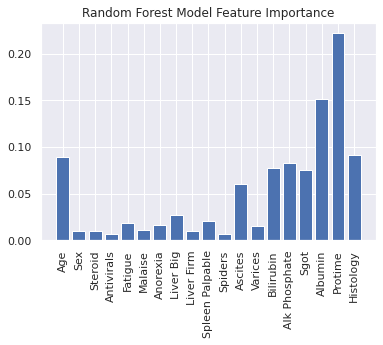

Number of MA1
Exudate1


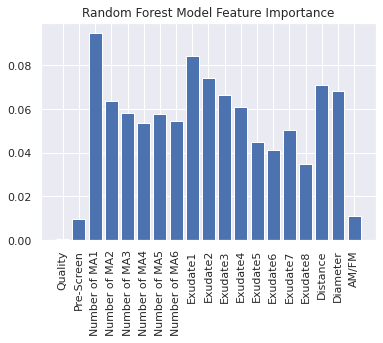

In [443]:
def random_forest(data):
    x, y = data.drop("Class", axis=1), data['Class']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    selection = RandomForestClassifier()
    selection.fit(x_train, y_train)
    feature_df = pd.DataFrame(
        {"Importance": selection.feature_importances_, "Features": data.drop("Class", axis=1).columns})
    sns.set()
    plt.bar(feature_df["Features"], feature_df["Importance"])
    biggest_element = np.sort(selection.feature_importances_)[-1]
    sec_biggest_element = np.sort(selection.feature_importances_)[-2]
    biggest_tag = feature_df["Features"][np.where(selection.feature_importances_ == biggest_element)[0][0]]
    next_biggest_tag = feature_df["Features"][np.where(selection.feature_importances_ == sec_biggest_element)[0][0]]

    print(biggest_tag)
    print(next_biggest_tag)
    plt.xticks(rotation=90)
    plt.title("Random Forest Model Feature Importance")
    plt.show()

    return biggest_tag, next_biggest_tag

d1_feat1, d1_feat2 = random_forest(data1)
d2_feat1, d2_feat2 =random_forest(data2)

# **KNN**



## **KNN Class**

In [444]:
# KNN
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:
  def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
  
  def fit(self, x, y):
      ''' Store the training data using this method as it is a lazy learner'''
      self.x = x
      self.y = y
      self.C = int(np.max(y) + 1)
      return self
  def predict(self, x_test):
      ''' 
      Makes a prediction using the stored training data and the test data given as argument
      Output format:
      y_prob = A numpy array with  N (x y) data points.
               x = Class 0 = DIE, y = Class 1 = LIVE. Both x and y are probabilities 
               of the data point fitting either class and ranges from 0 to 1.
      
      knns = A numpy array with dimension (N, K), where N = number of test_data. 
             The ith-row of knns stores the indices of k closest training samples to the ith-test sample.
             For K>1, they are stored in order of increasing distance.
             So if you want to use weighted K neighbors, the smaller the index, the higher the weight.
      '''
      num_test = x_test.shape[0]
      # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
      # self.x is in shape (100, 2), x_test is in shape (50, 2)
      # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
      # result: (x_test.shape[0], self.x.shape[0])
      distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
      
      knns = np.zeros((num_test, self.K), dtype=int)
      #ith-row of y_prob has the probability distribution over C classes
      y_prob = np.zeros((num_test, self.C))
      for i in range(num_test):
          knns[i,:] = np.argsort(distances[i])[:self.K]
          y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
      
      #simply divide by K to get a probability distribution
      y_prob /= self.K
      return y_prob, knns

  def evaluate_acc(self, y_true, y_target):
    return np.sum(y_target == y_true)/y_true.shape[0]


## **Dataset 1, Principal Component Analysis**

From the two Random Forest graphs above, we can say that Protime and Bilirubin are the two most important features for data1, and that Number of MA1 and Distance are the 2 features for data2. 


We have also decided to use the principal component analysis. At the end, we will compare the accuracy between PC1 vs PC2 and Bilirubin vs Protime and choose the most accurate pair of features.

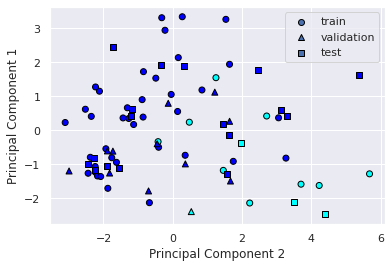

In [445]:
# DATASET 1: PCA 1 vs PCA 2
data1_acc, data1_k, data1_fn, data1_features = [], [], [], []

x = data1.drop("Class", axis=1).values
y = data1['Class'].values

# Standardizing the features
x = StandardScaler().fit_transform(pd.DataFrame(x).dropna())
pca = PCA(n_components=2)
principalComponentsDataset1 = pca.fit_transform(x)

x, y = principalComponentsDataset1, data1['Class']
# Split data into 60% train, 15% valid, 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, train_size = 15/40)

#visualization of the data
cmap = matplotlib.colors.ListedColormap(["cyan", "blue"])
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train', edgecolors = "black",cmap=cmap)
plt.scatter(x_valid[:,0], x_valid[:,1], c=y_valid, marker='^', label='validation', edgecolors = "black",cmap=cmap)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test', edgecolors = "black",cmap=cmap)
plt.legend()
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.show()


### **Euclidean vs Manhattan**

We will use both the euclidean and manhattan distance function to fine tune the hyperparamater k. 

Euclidean: accuracy for K=1 is 85.0.
Euclidean: best K = 9, test accuracy = 0.8
Manhattan: accuracy for K=1 is 80.0.
Manhattan: best K = 8, test accuracy = 0.75


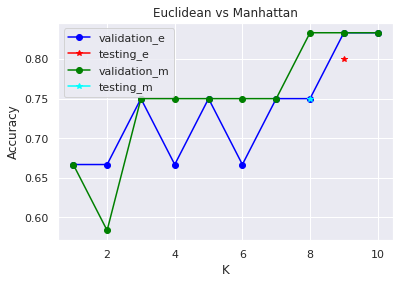

In [446]:
myK = 1
#EUCLIDEAN
model = KNN(K=myK)

# Convert the class value from float to int
y_test, y_train, y_valid = np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train]), np.array([int(item) for item in y_valid])

y_prob, knns = model.fit(x_train, y_train).predict(x_test)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = model.evaluate_acc(y_test, y_pred)
print(f'Euclidean: accuracy for K=1 is {accuracy*100:.1f}.')

# Choose best hyperparameter
model_choices=[]
valid_acc = []

n_valid = y_valid.shape[0]

for k in range(1,11):
    knn = KNN(K=k) # create a KNN object (OOP)
    y_valid_prob,_ = knn.fit(x_train, y_train).predict(x_valid)
    y_valid_pred = np.argmax(y_valid_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_valid, y_valid_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)
    
# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'Euclidean: best K = {best_valid_K}, test accuracy = {test_accuracy}')

# Plot the accuracy of each K
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation_e')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing_e')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
data1_acc.append(test_accuracy)
data1_k.append(best_valid_K)
data1_fn.append(euclidean)
data1_features.append("PCA")


#MANHATTAN
model_m = KNN(K=myK, dist_fn=manhattan)

# Convert the class value from float to int
y_test, y_train, y_valid = np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train]), np.array([int(item) for item in y_valid])
y_prob, knns = model_m.fit(x_train, y_train).predict(x_test)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = model_m.evaluate_acc(y_test, y_pred)
print(f'Manhattan: accuracy for K=1 is {accuracy*100:.1f}.')

# Choose best hyperparameter
model_choices=[]
valid_acc = []

n_valid = y_valid.shape[0]

for k in range(1,11):
    knn = KNN(K=k, dist_fn=manhattan) # create a KNN object (OOP)
    y_valid_prob,_ = knn.fit(x_train, y_train).predict(x_valid)
    y_valid_pred = np.argmax(y_valid_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_valid, y_valid_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)
    
# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K, dist_fn=manhattan)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'Manhattan: best K = {best_valid_K}, test accuracy = {test_accuracy}')

# Plot the accuracy of each K
plt.plot(model_choices, valid_acc, marker='o', color='green', label='validation_m')
plt.plot(best_valid_K, test_accuracy, marker='*', color='cyan', label='testing_m')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Euclidean vs Manhattan")
plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')
data1_acc.append(test_accuracy)
data1_k.append(best_valid_K)
data1_fn.append(manhattan)
data1_features.append("PCA")

## **Dataset 1, two best features**

Next, we are going to plot the graph between Bilirubin and Protime.

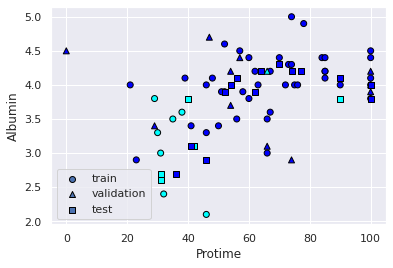

In [447]:
# DATASET 1: Best Features
x, y = data1[[d1_feat1, d1_feat2]].to_numpy(), data1['Class']

# Split data into 60% train, 15% valid, 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, train_size = 15/40)

#visualization of the data
cmap = matplotlib.colors.ListedColormap(["cyan", "blue"])
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train', edgecolors="black",cmap=cmap)
plt.scatter(x_valid[:,0], x_valid[:,1], c=y_valid, marker='^', label='validation', edgecolors="black",cmap=cmap)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test', edgecolors="black",cmap=cmap)
plt.legend()
plt.xlabel(d1_feat1)
plt.ylabel(d1_feat2)
plt.show()

### **Euclidean vs Manhattan**

 We will use both the euclidean distance and manhattan distance to find the best k.

Euclidean: accuracy for K=1 is 80.0.
Euclidean: best K = 1, test accuracy = 0.8
Manhattan: accuracy for K=1 is 80.0.
Manhattan: best K = 1, test accuracy = 0.8


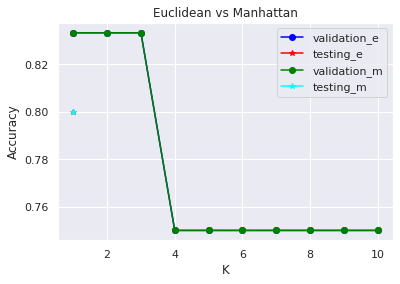

In [448]:
myK = 1
#EUCLIDEAN
model = KNN(K=myK)
y_test, y_train, y_valid = np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train]), np.array([int(item) for item in y_valid])
y_prob, knns = model.fit(x_train, y_train).predict(x_test)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = model.evaluate_acc(y_test, y_pred)
print(f'Euclidean: accuracy for K=1 is {accuracy*100:.1f}.')

# Choose best hyperparameter
model_choices=[]
valid_acc = []

n_valid = y_valid.shape[0]

for k in range(1,11):
    knn = KNN(K=k) # create a KNN object (OOP)
    y_valid_prob,_ = knn.fit(x_train, y_train).predict(x_valid)
    y_valid_pred = np.argmax(y_valid_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_valid, y_valid_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)
    
# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'Euclidean: best K = {best_valid_K}, test accuracy = {test_accuracy}')

# Plot the accuracy of each K
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation_e')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing_e')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
data1_acc.append(test_accuracy)
data1_k.append(best_valid_K)
data1_fn.append(euclidean)
data1_features.append("Features")

#MANHATTAN
model_m = KNN(K=myK, dist_fn=manhattan)

# Convert the class value from float to int
y_test, y_train, y_valid = np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train]), np.array([int(item) for item in y_valid])

y_prob, knns = model_m.fit(x_train, y_train).predict(x_test)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = model_m.evaluate_acc(y_test, y_pred)
print(f'Manhattan: accuracy for K=1 is {accuracy*100:.1f}.')

# Choose best hyperparameter
model_choices=[]
valid_acc = []

n_valid = y_valid.shape[0]

for k in range(1,11):
    knn = KNN(K=k, dist_fn=manhattan) # create a KNN object (OOP)
    y_valid_prob,_ = knn.fit(x_train, y_train).predict(x_valid)
    y_valid_pred = np.argmax(y_valid_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_valid, y_valid_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)
    
# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K, dist_fn=manhattan)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'Manhattan: best K = {best_valid_K}, test accuracy = {test_accuracy}')

# Plot the accuracy of each K
plt.plot(model_choices, valid_acc, marker='o', color='green', label='validation_m')
plt.plot(best_valid_K, test_accuracy, marker='*', color='cyan', label='testing_m')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Euclidean vs Manhattan")
plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')
data1_acc.append(test_accuracy)
data1_k.append(best_valid_K)
data1_fn.append(manhattan)
data1_features.append("Features")

## **Decision Boundary for dataset 1, KNN**

Based on the graphs above for dataset 1, we used lists to keep track of the best accuracy, as well as the cost function used, the two best features and the best hyperparameter. With this in mind, we can plot the decision boundaries as follows. 

accuracy: 85.0.


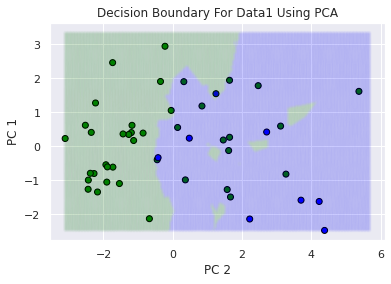

<Figure size 432x288 with 0 Axes>

In [449]:
#choose from the above observations
index = data1_acc.index(max(data1_acc))
best_k1, fn1, best_features1 = data1_k[index], data1_fn[index], data1_features[index]

if best_features1 == "PCA":
  x, y = principalComponentsDataset1, data1['Class']
  ylabel = "PC 1"
  xlabel = "PC 2"
else:
  x, y = data1[[d1_feat1, d1_feat2]].to_numpy(), data1['Class']
  xlabel = d1_feat1
  ylabel = d1_feat2


#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

# Split data into 60% train, 15% valid, 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, train_size = 15/40)
y_test, y_train= np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train])


model = KNN(K=best_k1, dist_fn=fn1)
y_train_prob = np.zeros((y_train.shape[0], 2))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)    
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
acc = f'accuracy: {accuracy*100:.1f}.'
print(acc)


#to get class probability of all the points in the 2D grid
y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)


y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
y_pred_all = y_pred_all[:, 0]
y_train_prob = y_train_prob[:, 0]
y_prob_all = y_prob_all[:, 0]

cmap = matplotlib.colors.ListedColormap(["green", "blue", "blue"])

plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1, edgecolors="black",cmap=cmap)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.02,cmap=cmap)
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.title("Decision Boundary For Data1 Using " + best_features1)
plt.show()
plt.savefig('decision_boundaries_data1_KNN_'+str(best_k1)+'.png', dpi=300, bbox_inches='tight') 

## **Dataset 2, Principal Component Analysis**

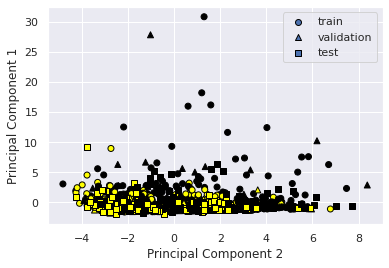

In [450]:
# DATASET 2 : 2 PCA
data2_acc, data2_k, data2_fn, data2_features = [], [], [], []

x2 = data2.drop("Class", axis=1).values
y = data1['Class'].values

# Standardizing the features
x2 = StandardScaler().fit_transform(pd.DataFrame(x2).dropna())
pca = PCA(n_components=2)
principalComponentsDataset2 = pca.fit_transform(x2)

x, y = principalComponentsDataset2, data2['Class']

# Split data into 70% train, 10% valid, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, train_size = 10/30)

#visualization of the data
cmap = matplotlib.colors.ListedColormap(["yellow", "black"])
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train', edgecolors="black",cmap=cmap)
plt.scatter(x_valid[:,0], x_valid[:,1], c=y_valid, marker='^', label='validation', edgecolors="black",cmap=cmap)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test', edgecolors="black",cmap=cmap)
plt.legend()
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.show()

### **Euclidean vs Manhattan**

Euclidean: accuracy for K=1 is 60.6.
Euclidean: best K = 30, test accuracy = 0.6363636363636364
Manhattan: accuracy for K=1 is 58.0.
Manhattan: best K = 10, test accuracy = 0.5930735930735931


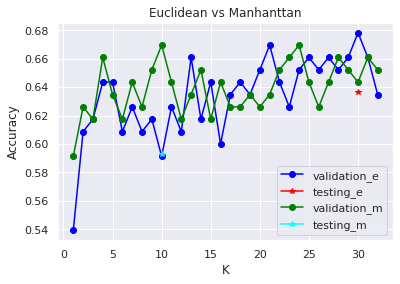

In [451]:
myK = 1
#EUCLIDEAN
model = KNN(K=myK)

y_test, y_train, y_valid = np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train]), np.array([int(item) for item in y_valid])

y_prob, knns = model.fit(x_train, y_train).predict(x_test)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = model.evaluate_acc(y_test, y_pred)
print(f'Euclidean: accuracy for K=1 is {accuracy*100:.1f}.')

# Choose best hyperparameter
model_choices=[]
valid_acc = []
MAX_RANGE = int(np.sqrt(data2.shape[0]))

n_valid = y_valid.shape[0]

for k in range(1,MAX_RANGE):
    knn = KNN(K=k) # create a KNN object (OOP)
    y_valid_prob,_ = knn.fit(x_train, y_train).predict(x_valid)
    y_valid_pred = np.argmax(y_valid_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_valid, y_valid_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)
    
# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'Euclidean: best K = {best_valid_K}, test accuracy = {test_accuracy}')

# Plot the accuracy of each K
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation_e')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing_e')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
data2_acc.append(test_accuracy)
data2_k.append(best_valid_K)
data2_fn.append(euclidean)
data2_features.append("PCA")


#MANHATTAN
model_m = KNN(K=myK, dist_fn=manhattan)

y_test, y_train, y_valid = np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train]), np.array([int(item) for item in y_valid])

y_prob, knns = model_m.fit(x_train, y_train).predict(x_test)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = model_m.evaluate_acc(y_test, y_pred)
print(f'Manhattan: accuracy for K=1 is {accuracy*100:.1f}.')

# Choose best hyperparameter
model_choices=[]
valid_acc = []
MAX_RANGE = int(np.sqrt(data2.shape[0]))

n_valid = y_valid.shape[0]

for k in range(1,MAX_RANGE):
    knn = KNN(K=k, dist_fn=manhattan) # create a KNN object (OOP)
    y_valid_prob,_ = knn.fit(x_train, y_train).predict(x_valid)
    y_valid_pred = np.argmax(y_valid_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_valid, y_valid_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)
    
# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K, dist_fn=manhattan)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'Manhattan: best K = {best_valid_K}, test accuracy = {test_accuracy}')

# Plot the accuracy of each K
plt.plot(model_choices, valid_acc, marker='o', color='green', label='validation_m')
plt.plot(best_valid_K, test_accuracy, marker='*', color='cyan', label='testing_m')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Euclidean vs Manhanttan")
plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')
data2_acc.append(test_accuracy)
data2_k.append(best_valid_K)
data2_fn.append(manhattan)
data2_features.append("PCA")

## **Dataset 2, two best features**

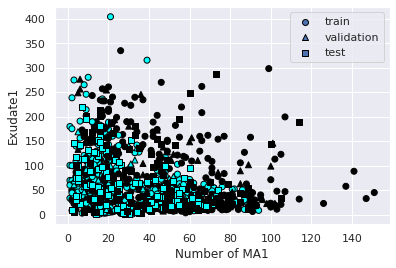

In [452]:
# DATASET 2 : Number of MA1 vs Distance
x, y = data2[[d2_feat1, d2_feat2]].to_numpy(), data2['Class']

# Split data into 70% train, 10% valid, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, train_size = 10/30)

#visualization of the data
cmap = matplotlib.colors.ListedColormap(["cyan", "black"])
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train', edgecolors="black",cmap=cmap)
plt.scatter(x_valid[:,0], x_valid[:,1], c=y_valid, marker='^', label='validation', edgecolors="black",cmap=cmap)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test', edgecolors="black",cmap=cmap)
plt.legend()
plt.xlabel(d2_feat1)
plt.ylabel(d2_feat2)
plt.show()

### **Euclidean vs Manhattan**

Euclidean: accuracy for K=1 is 56.7.
Euclidean: best K = 9, test accuracy = 0.5844155844155844
Manhattan: accuracy for K=1 is 57.1.
Manhattan: best K = 5, test accuracy = 0.6060606060606061


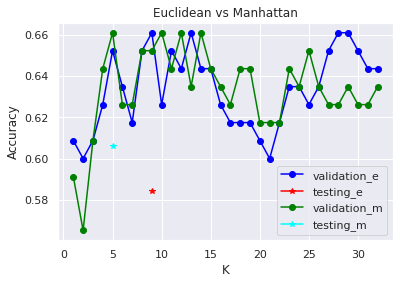

In [453]:
myK = 1
#EUCLIDEAN
model = KNN(K=myK)

y_test, y_train, y_valid = np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train]), np.array([int(item) for item in y_valid])

y_prob, knns = model.fit(x_train, y_train).predict(x_test)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = model.evaluate_acc(y_test, y_pred)
print(f'Euclidean: accuracy for K=1 is {accuracy*100:.1f}.')

# Choose best hyperparameter
model_choices=[]
valid_acc = []
MAX_RANGE = int(np.sqrt(data2.shape[0]))

n_valid = y_valid.shape[0]

for k in range(1,MAX_RANGE):
    knn = KNN(K=k) # create a KNN object (OOP)
    y_valid_prob,_ = knn.fit(x_train, y_train).predict(x_valid)
    y_valid_pred = np.argmax(y_valid_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_valid, y_valid_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)
    
# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'Euclidean: best K = {best_valid_K}, test accuracy = {test_accuracy}')

# Plot the accuracy of each K
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation_e')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing_e')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
data2_acc.append(test_accuracy)
data2_k.append(best_valid_K)
data2_fn.append(euclidean)
data2_features.append("Features")

#MANHATTAN
model_m = KNN(K=myK, dist_fn=manhattan)

y_test, y_train, y_valid = np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train]), np.array([int(item) for item in y_valid])

y_prob, knns = model_m.fit(x_train, y_train).predict(x_test)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = model_m.evaluate_acc(y_test, y_pred)
print(f'Manhattan: accuracy for K=1 is {accuracy*100:.1f}.')

# Choose best hyperparameter
model_choices=[]
valid_acc = []
MAX_RANGE = int(np.sqrt(data2.shape[0]))

n_valid = y_valid.shape[0]

for k in range(1,MAX_RANGE):
    knn = KNN(K=k, dist_fn=manhattan) # create a KNN object (OOP)
    y_valid_prob,_ = knn.fit(x_train, y_train).predict(x_valid)
    y_valid_pred = np.argmax(y_valid_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_valid, y_valid_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)
    
# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K, dist_fn=manhattan)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'Manhattan: best K = {best_valid_K}, test accuracy = {test_accuracy}')

# Plot the accuracy of each K
plt.plot(model_choices, valid_acc, marker='o', color='green', label='validation_m')
plt.plot(best_valid_K, test_accuracy, marker='*', color='cyan', label='testing_m')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Euclidean vs Manhattan")
plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')
data2_acc.append(test_accuracy)
data2_k.append(best_valid_K)
data2_fn.append(manhattan)
data2_features.append("Features")

## **Decision Boundary for dataset 2, KNN**

From the plots above, we have observed that the most accurate plot for data2 consists of plotting PC 1 vs PC 2 with the manhattan function and k = 18. 

accuracy: 61.0.


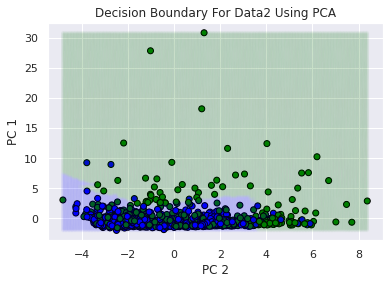

<Figure size 432x288 with 0 Axes>

In [454]:
#Choose from the above observations
index = data2_acc.index(max(data2_acc))
best_k2, fn2, best_features2 = data2_k[index], data2_fn[index], data2_features[index]

if best_features2 == "PCA":
  x, y = principalComponentsDataset2, data2['Class']
  ylabel = "PC 1"
  xlabel = "PC 2"
else:
  x, y = data2[[d2_feat1, d2_feat2]].to_numpy(), data2['Class']
  xlabel = d2_feat1
  ylabel = d2_feat2


#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

# Split data into 70% train, 10% valid, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, train_size = 10/30)

y_test, y_train= np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train])

model = KNN(K=best_k2, dist_fn=fn2)
y_train_prob = np.zeros((y_train.shape[0], 2))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1) 

y_pred = np.argmax(y_prob,axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
acc = f'accuracy: {accuracy*100:.1f}.'
print(acc)

#to get class probability of all the points in the 2D grid
y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)

y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
y_pred_all = y_pred_all[:, 0]
y_train_prob = y_train_prob[:, 0]
y_prob_all = y_prob_all[:, 0]

cmap = matplotlib.colors.ListedColormap(["green", "blue", "blue"])

plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1, edgecolors="black",cmap=cmap)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.02,cmap=cmap)
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.title("Decision Boundary For Data2 Using " + best_features2)
plt.show()
plt.savefig('decision_boundaries_data2_KNN_'+str(best_k2)+'.png', dpi=300, bbox_inches='tight') 

# **Weighted KNN**

We will also implement a Weighted KNN algorithm. The intuition behind this algorithm is to give more weight to points that are closer to our testing point, and less weight to those that are farther. A simple function that we chose to use is the inverse distance function. This way, the weight of a point decreases as its distance to the testing point increases. 

## **Dataset 1, Weighted KNN**

accuracy: 75.0.


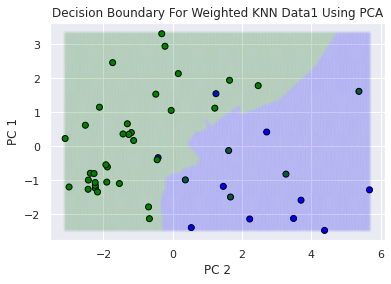

<Figure size 432x288 with 0 Axes>

In [455]:
if best_features1 == "PCA":
  x, y = principalComponentsDataset1, data1['Class']
  ylabel = "PC 1"
  xlabel = "PC 2"
else:
  x, y = data1[[d1_feat1, d1_feat2]].to_numpy(), data1['Class']
  xlabel = d1_feat1
  ylabel = d1_feat2

#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

# Split data into 60% train, 15% valid, 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, train_size = 15/40)

y_test, y_train= np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train])

model = KNN(K=best_k1, dist_fn=fn1)
y_train_prob = np.zeros((y_train.shape[0], 2))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
num_test = x_test.shape[0]
distances = fn1(x_train[None,:,:], x_test[:,None,:])
for i in range(num_test): #ith test point
  freq0 = 0
  freq1 = 0
  for j in range(knns.shape[1]): #jth index in knn
    if y_train[j] == 0:
      freq0 += 1/(distances[i][j])
    else:
      freq1 += 1/(distances[i][j])
  
  if freq0 > freq1:
    y_prob[i:] = np.asarray([1, 0])
  else:
    y_prob[i:] = np.asarray([0, 1])

y_pred = np.argmax(y_prob,axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
acc = f'accuracy: {accuracy*100:.1f}.'
print(acc)

#to get class probability of all the points in the 2D grid
y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)


y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
y_pred_all = y_pred_all[:, 0]
y_train_prob = y_train_prob[:, 0]
y_prob_all = y_prob_all[:, 0]


cmap = matplotlib.colors.ListedColormap(["green", "blue", "blue"])

plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1, edgecolors="black",cmap=cmap)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.02,cmap=cmap)

plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.title("Decision Boundary For Weighted KNN Data1 Using " + best_features1)
plt.show()
plt.savefig('decision_boundaries_data1_weighted_KNN_'+str(k)+'.png', dpi=300, bbox_inches='tight') 


## **Dataset 2, Weighted KNN**

accuracy: 54.1.


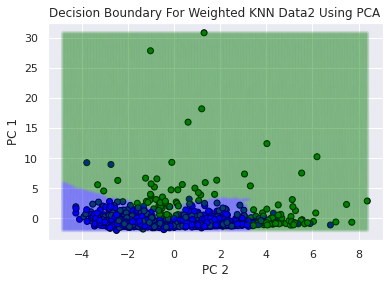

<Figure size 432x288 with 0 Axes>

In [456]:
if best_features2 == "PCA":
  x, y = principalComponentsDataset2, data2['Class']
  ylabel = "PC 1"
  xlabel = "PC 2"
else:
  x, y = data2[[d2_feat1, d2_feat2]].to_numpy(), data2['Class']
  xlabel = d2_feat1
  ylabel = d2_feat2

#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

# Split data into 60% train, 15% valid, 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, train_size = 10/30)

y_test, y_train= np.array([int(item) for item in y_test]), np.array([int(item) for item in y_train])

model = KNN(K=best_k2, dist_fn=fn2)
y_train_prob = np.zeros((y_train.shape[0], 2))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
num_test = x_test.shape[0]
distances = fn2(x_train[None,:,:], x_test[:,None,:])
for i in range(num_test): #ith test
  freq0 = 0
  freq1 = 0
  for j in range(knns.shape[1]): #jth index in knn
    if y_train[j] == 0:
      freq0 += 1/(distances[i][j])
    else:
      freq1 += 1/(distances[i][j])
  
  if freq0 > freq1:
    y_prob[i:] = np.asarray([1, 0])
  else:
    y_prob[i:] = np.asarray([0, 1])
  
y_pred = np.argmax(y_prob,axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
acc = f'accuracy: {accuracy*100:.1f}.'
print(acc)

#to get class probability of all the points in the 2D grid
y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
y_pred_all = y_pred_all[:, 0]
y_train_prob = y_train_prob[:, 0]
y_prob_all = y_prob_all[:, 0]

cmap = matplotlib.colors.ListedColormap(["green", "blue", "blue"])

plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1, edgecolors="black",cmap=cmap)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.05,cmap=cmap)
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.title("Decision Boundary For Weighted KNN Data2 Using " + best_features2)
plt.show()
plt.savefig('decision_boundaries_data2_weighted_KNN_'+str(k)+'.png', dpi=300, bbox_inches='tight') 


# **DECISION TREE** 

## **Decision Tree Class**

In [457]:
#np.random.seed(1234)
MAX_DEPTH = 2
MIN_SAMPLES = 2
MODE = "entropy"  # "entropy", "gini"

# Create a Node class
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
      '''constructor'''
      self.feature_index = feature_index
      self.threshold = threshold
      self.left = left
      self.right = right
      self.info_gain = info_gain
      self.value = value  # Leaf node only

class DecisionTree:
  def __init__(self, min_samples_split=MIN_SAMPLES, max_depth = MAX_DEPTH, mode = MODE):
    '''constructor'''
    
    # initialize root of tree
    self.root = None
    self.mode = mode
    # stopping conditions
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
  
  def build_tree(self, dataset, curr_depth = 0):
    '''recursive function to build tree'''
    X, Y = dataset[:,:-1], dataset[:,-1]  # Split data into X = features and Y = Class
    num_samples, num_features = np.shape(X)

    # split data until stopping conditions are met (base case)
    if num_samples>= self.min_samples_split and curr_depth <= self.max_depth:
      best_split = self.get_best_split(dataset, num_samples, num_features)
      
      # Check if information gain is positive (don't want to split pure data)
      if best_split["info_gain"]>0:
        left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
        right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
        return Node(best_split["feature_index"], best_split["threshold"], left_subtree, right_subtree, best_split["info_gain"])
    
    # Compute Leaf node
    leaf_value = self.calculate_leaf_value(Y)
    return Node(value=leaf_value)


  def get_best_split(self, dataset, num_samples, num_features):
    '''function to find best split'''

    # We will use a dictionnary to store best split, including Node attributes
    best_split = {}
    max_info_gain = -float("inf")

    # Loop over all the features
    for feature_index in range(num_features):
      # Get all the encountered values of a single feature
      feature_values = dataset[:, feature_index]
      possible_thresholds = np.unique(feature_values)

      # Loop over each possible threshold
      for threshold in possible_thresholds:
        dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
        
        # check if children are non null
        if len(dataset_left)>0 and len(dataset_right)>0:
          y, left_y, right_y = dataset[:,-1], dataset_left[:,-1], dataset_right[:,-1]
          curr_info_gain = self.information_gain(y, left_y, right_y, self.mode)
          if curr_info_gain>max_info_gain:
            # Update best_split dictionnary
            best_split["feature_index"] = feature_index
            best_split["threshold"] = threshold
            best_split["dataset_left"] = dataset_left
            best_split["dataset_right"] = dataset_right
            best_split["info_gain"] = curr_info_gain
            max_info_gain = curr_info_gain
    
    return best_split

  def split(self, dataset, feature_index, threshold):
    dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
    dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
    return dataset_left, dataset_right
  
  def information_gain(self, parent, l_child, r_child, mode):
    weight_l = len(l_child)/len(parent)
    weight_r = len(r_child)/len(parent)

    # Calculate information gain depending on the cost function
    if mode == "entropy":
      gain = self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r * self.entropy(r_child))
    else:
      gain = self.gini_index(parent) - (weight_l * self.gini_index(l_child) + weight_r * self.gini_index(r_child))

    return gain
  
  def entropy(self, y):
   class_labels = np.unique(y)
   entropy = 0
   for cls in class_labels:
     p_cls = len(y[y == cls])/len(y)
     entropy += -p_cls*np.log2(p_cls)

   return entropy

  def gini_index(self, y):
    dead = [status for status in y if status == 0]
    alive = [status for status in y if status == 1]
    gini = 1 - ((len(dead)/len(y))**2 + (len(alive)/len(y))**2)
    return gini

  def calculate_leaf_value(self, Y):
    '''Return label with highest occurrence'''
    Y = list(Y)
    return max(Y, key = Y.count)
  
  def fit(self, X, Y):
    '''initialize the root'''
    dataset = np.concatenate((X,Y), axis=1)
    self.root = self.build_tree(dataset)
    return self

  def predict(self, X):
    '''Make prediction for a dataset of test points'''
    predictions = [self.make_prediction(x, self.root) for x in X]
    return predictions
  
  def make_prediction(self, x , node):
    '''recursively make a prediction for a single test point'''

    # Check if we are at a leaf node
    if node.value != None:
      return node.value
    
    feature_val = x[node.feature_index]

    if feature_val <= node.threshold:
      return self.make_prediction(x, node.left)
    else:
      return self.make_prediction(x, node.right)

  def evaluate_acc(self, y_pred, y_data, n_data):
    sum = 0
    for i in range(n_data):
      if y_pred[i] == y_data[i]:
        sum+=1
    return sum/n_data




## **Decision Tree: Entropy**

### **Dataset 1: PC 1 VS PC 2**

Entropy: best depth = 1, test accuracy = 0.6666666666666666
Gini index: best depth = 1, test accuracy = 0.6666666666666666


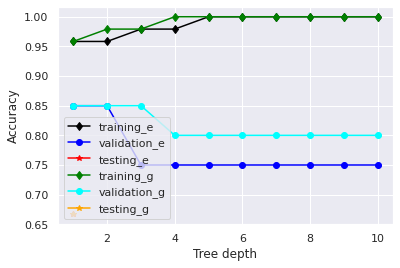

In [458]:
#np.random.seed(453)
data1_acc, data1_depth, data1_mode, data1_features = [], [], [], []

X, Y = principalComponentsDataset1, data1['Class'].values.reshape(-1,1)
# Split data into 60% train, 15% valid, 25% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6)  # First split: 60% train, 40% valid+test

# Split data into 60% train, 15% valid, 25% test
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size = 15/40) # Second split: 15/40% valid, 25/40 % test

# Get best hyperparameters

# Entropy
model_choices1 = []
train_acc1 = []
valid_acc1 = []

# Gini index
model_choices2 = []
train_acc2 = []
valid_acc2 = []

n_train = Y_train.shape[0]
n_valid = Y_valid.shape[0]

for k in range(1, 11):

    # Entropy
    dt1 = DecisionTree(max_depth=k, mode = "entropy") # create a KNN object (OOP)
    y_train_pred = dt1.fit(X_train, Y_train).predict(X_train)
    acc_tr = dt1.evaluate_acc(y_train_pred, Y_train, n_train)

    y_valid_pred = dt1.fit(X_train, Y_train).predict(X_valid)
    acc_va = dt1.evaluate_acc(y_valid_pred, Y_valid, n_valid)

    model_choices1.append(k)
    train_acc1.append(acc_tr)
    valid_acc1.append(acc_va)

    # Gini index
    dt2 = DecisionTree(max_depth=k, mode = "gini") # create a KNN object (OOP)
    y_train_pred = dt2.fit(X_train, Y_train).predict(X_train)
    acc_tr = dt2.evaluate_acc(y_train_pred, Y_train, n_train)

    y_valid_pred = dt2.fit(X_train, Y_train).predict(X_valid)
    acc_va = dt2.evaluate_acc(y_valid_pred, Y_valid, n_valid)

    model_choices2.append(k)
    train_acc2.append(acc_tr)
    valid_acc2.append(acc_va)

# Use the best K to predict test data
# Entropy
best_depth1 = model_choices1[valid_acc1.index(max(valid_acc1))]
dt1 = DecisionTree(max_depth=best_depth1, mode = "entropy")
y_test_pred = dt1.fit(X_train, Y_train).predict(X_test)
test_accuracy1 = dt1.evaluate_acc(y_test_pred, Y_test, Y_test.shape[0])
print(f'Entropy: best depth = {best_depth1}, test accuracy = {test_accuracy1}')
data1_acc.append(test_accuracy1)
data1_depth.append(best_depth1)
data1_mode.append("entropy")
data1_features.append("PCA")

# Gini index
best_depth2 = model_choices2[valid_acc2.index(max(valid_acc2))]
dt2 = DecisionTree(max_depth=best_depth2, mode = "gini")
y_test_pred = dt2.fit(X_train, Y_train).predict(X_test)
test_accuracy2 = dt2.evaluate_acc(y_test_pred, Y_test, Y_test.shape[0])
print(f'Gini index: best depth = {best_depth2}, test accuracy = {test_accuracy2}')
data1_acc.append(test_accuracy2)
data1_depth.append(best_depth1)
data1_mode.append("gini")
data1_features.append("PCA")

# Entropy plot
plt.plot(model_choices1, train_acc1, marker='d', color='black', label='training_e')
plt.plot(model_choices1, valid_acc1, marker='o', color='blue', label='validation_e')
plt.plot(best_depth1, test_accuracy1, marker='*', color='red', label='testing_e')

#Gini index plot
plt.plot(model_choices2, train_acc2, marker='d', color='green', label='training_g')
plt.plot(model_choices2, valid_acc2, marker='o', color='cyan', label='validation_g')
plt.plot(best_depth2, test_accuracy2, marker='*', color='orange', label='testing_g')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')

### **Dataset 1: Two Best Features**

Entropy: best depth = 1, test accuracy = 0.9166666666666666
Gini index: best depth = 1, test accuracy = 0.8333333333333334


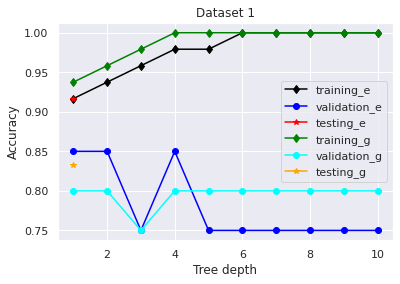

In [459]:
X, Y = data1[[d1_feat1, d1_feat2]].to_numpy(), data1['Class'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6)  # First split: 60% train, 40% valid+test

# Split data into 60% train, 15% valid, 25% test
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size = 15/40) # Second split: 15/40% valid, 25/40 % test

# Get best hyperparameters

# Entropy
model_choices1 = []
train_acc1 = []
valid_acc1 = []

# Gini index
model_choices2 = []
train_acc2 = []
valid_acc2 = []

n_train = Y_train.shape[0]
n_valid = Y_valid.shape[0]

for k in range(1, 11):

    # Entropy
    dt1 = DecisionTree(max_depth=k, mode = "entropy") # create a KNN object (OOP)
    y_train_pred = dt1.fit(X_train, Y_train).predict(X_train)
    acc_tr = dt1.evaluate_acc(y_train_pred, Y_train, n_train)

    y_valid_pred = dt1.predict(X_valid)
    acc_va = dt1.evaluate_acc(y_valid_pred, Y_valid, n_valid)

    model_choices1.append(k)
    train_acc1.append(acc_tr)
    valid_acc1.append(acc_va)

    # Gini index
    dt2 = DecisionTree(max_depth=k, mode = "gini") # create a KNN object (OOP)
    y_train_pred = dt2.fit(X_train, Y_train).predict(X_train)
    acc_tr = dt2.evaluate_acc(y_train_pred, Y_train, n_train)

    y_valid_pred = dt2.predict(X_valid)
    acc_va = dt2.evaluate_acc(y_valid_pred, Y_valid, n_valid)

    model_choices2.append(k)
    train_acc2.append(acc_tr)
    valid_acc2.append(acc_va)

# Use the best K to predict test data

# Entropy
best_depth1 = model_choices1[valid_acc1.index(max(valid_acc1))]
dt1 = DecisionTree(max_depth=best_depth1, mode = "entropy")
y_test_pred = dt1.fit(X_train, Y_train).predict(X_test)
test_accuracy1 = dt1.evaluate_acc(y_test_pred, Y_test, Y_test.shape[0])
print(f'Entropy: best depth = {best_depth1}, test accuracy = {test_accuracy1}')
data1_acc.append(test_accuracy1)
data1_depth.append(best_depth1)
data1_mode.append("entropy")
data1_features.append("Features")

# Gini index
best_depth2 = model_choices2[valid_acc2.index(max(valid_acc2))]
dt2 = DecisionTree(max_depth=best_depth2, mode = "gini")
y_test_pred = dt2.fit(X_train, Y_train).predict(X_test)
test_accuracy2 = dt2.evaluate_acc(y_test_pred, Y_test, Y_test.shape[0])
print(f'Gini index: best depth = {best_depth2}, test accuracy = {test_accuracy2}')
data1_acc.append(test_accuracy2)
data1_depth.append(best_depth2)
data1_mode.append("gini")
data1_features.append("Features")

# Entropy plot
plt.plot(model_choices1, train_acc1, marker='d', color='black', label='training_e')
plt.plot(model_choices1, valid_acc1, marker='o', color='blue', label='validation_e')
plt.plot(best_depth1, test_accuracy1, marker='*', color='red', label='testing_e')
#Gini index plot
plt.plot(model_choices2, train_acc2, marker='d', color='green', label='training_g')
plt.plot(model_choices2, valid_acc2, marker='o', color='cyan', label='validation_g')
plt.plot(best_depth2, test_accuracy2, marker='*', color='orange', label='testing_g')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.title("Dataset 1")
plt.legend(loc='best')

### **Dataset 1: Decision Boundary Graph**

accuracy: 84.4.


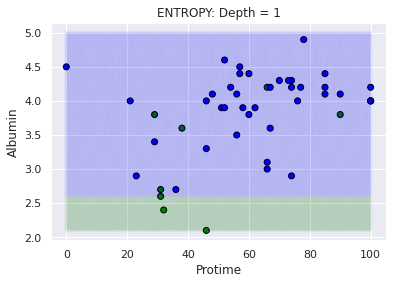

In [460]:
index = data1_acc.index(max(data1_acc))
best_depth1, best_mode1, best_features = data1_depth[index], data1_mode[index], data1_features[index]

if best_features == "PCA":
  X, Y = principalComponentsDataset1, data1['Class'].values.reshape(-1,1)
  ylabel = "PC 1"
  xlabel = "PC 2"
else:
  X, Y = data1[[d1_feat1, d1_feat2]].to_numpy(), data1['Class'].values.reshape(-1,1)
  xlabel = d1_feat1
  ylabel = d1_feat2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6)  # First split: 60% train, 40% valid+test

x0v = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 200)
x1v = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T


model = DecisionTree(max_depth=best_depth1, mode = best_mode1)

y_prob = model.fit(X_train, Y_train).predict(X_test)   
accuracy = model.evaluate_acc(y_prob, Y_test, Y_test.shape[0])
acc = f'accuracy: {accuracy*100:.1f}.'
print(acc)


y_prob_all = model.fit(X_train, Y_train).predict(x_all)

cmap = matplotlib.colors.ListedColormap(["green", "blue", "blue"])

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, marker='o', alpha=1, edgecolors="black",cmap=cmap)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.02,cmap=cmap)

plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.title(best_mode1.upper() + ': Depth = ' + str(best_depth1))
plt.show()

### **Dataset 2: PCA 1 vs PCA 2**

Entropy: best depth = 1, test accuracy = 0.6329479768786127
Gini index: best depth = 1, test accuracy = 0.6329479768786127


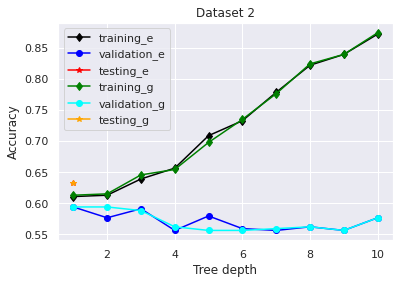

In [461]:
data2_acc, data2_depth, data2_mode, data2_features =[], [], [], []

X, Y = principalComponentsDataset2, data2['Class'].values.reshape(-1,1)

# Split: 60% train, 20% valid, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size = 20/40) # Second split: 15/40% valid, 25/40 % test

# Get best hyperparameters

# Entropy
model_choices1 = []
train_acc1 = []
valid_acc1 = []

# Gini index
model_choices2 = []
train_acc2 = []
valid_acc2 = []

n_train = Y_train.shape[0]
n_valid = Y_valid.shape[0]

for k in range(1, 11):
    # Entropy
    dt1 = DecisionTree(max_depth=k, mode = "entropy") # create a KNN object (OOP)
    y_train_pred = dt1.fit(X_train, Y_train).predict(X_train)
    acc_tr = dt1.evaluate_acc(y_train_pred, Y_train, n_train)

    y_valid_pred = dt1.predict(X_valid)
    acc_va = dt1.evaluate_acc(y_valid_pred, Y_valid, n_valid)

    model_choices1.append(k)
    train_acc1.append(acc_tr)
    valid_acc1.append(acc_va)

    # Gini index
    dt2 = DecisionTree(max_depth=k, mode = "gini") # create a KNN object (OOP)
    y_train_pred = dt2.fit(X_train, Y_train).predict(X_train)
    acc_tr = dt2.evaluate_acc(y_train_pred, Y_train, n_train)

    y_valid_pred = dt2.predict(X_valid)
    acc_va = dt2.evaluate_acc(y_valid_pred, Y_valid, n_valid)

    model_choices2.append(k)
    train_acc2.append(acc_tr)
    valid_acc2.append(acc_va)

# Use the best K to predict test data

# Entropy
best_depth1 = model_choices1[valid_acc1.index(max(valid_acc1))]
dt1 = DecisionTree(max_depth=best_depth1, mode = "entropy")
y_test_pred = dt1.fit(X_train, Y_train).predict(X_test)
test_accuracy1 = dt1.evaluate_acc(y_test_pred, Y_test, Y_test.shape[0])
print(f'Entropy: best depth = {best_depth1}, test accuracy = {test_accuracy1}')
data2_acc.append(test_accuracy1)
data2_depth.append(best_depth1)
data2_mode.append("entropy")
data2_features.append("PCA")

# Gini index
best_depth2 = model_choices2[valid_acc2.index(max(valid_acc2))]
dt2 = DecisionTree(max_depth=best_depth2, mode = "gini")
y_test_pred = dt2.fit(X_train, Y_train).predict(X_test)
test_accuracy2 = dt2.evaluate_acc(y_test_pred, Y_test, Y_test.shape[0])
print(f'Gini index: best depth = {best_depth2}, test accuracy = {test_accuracy2}')
data2_acc.append(test_accuracy2)
data2_depth.append(best_depth2)
data2_mode.append("gini")
data2_features.append("PCA")

# Entropy plot
plt.plot(model_choices1, train_acc1, marker='d', color='black', label='training_e')
plt.plot(model_choices1, valid_acc1, marker='o', color='blue', label='validation_e')
plt.plot(best_depth1, test_accuracy1, marker='*', color='red', label='testing_e')
#Gini index plot
plt.plot(model_choices2, train_acc2, marker='d', color='green', label='training_g')
plt.plot(model_choices2, valid_acc2, marker='o', color='cyan', label='validation_g')
plt.plot(best_depth2, test_accuracy2, marker='*', color='orange', label='testing_g')

plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.title("Dataset 2")
plt.legend(loc='best')

### **Dataset 2: Two Best Features**

Entropy: best depth = 7, test accuracy = 0.5923076923076923
Gini index: best depth = 5, test accuracy = 0.6


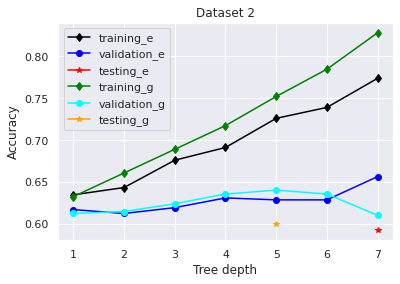

In [462]:
X, Y = data2[[d2_feat1, d2_feat2]].to_numpy(), data2['Class'].values.reshape(-1,1)

# Split: 60% train, 20% valid, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size = 15/40) # Second split: 15/40% valid, 25/40 % test

# Get best hyperparameters

# Entropy
model_choices1 = []
train_acc1 = []
valid_acc1 = []

# Gini index
model_choices2 = []
train_acc2 = []
valid_acc2 = []

n_train = Y_train.shape[0]
n_valid = Y_valid.shape[0]

for k in range(1, 8):

    # Entropy
    dt1 = DecisionTree(max_depth=k, mode = "entropy") # create a KNN object (OOP)
    y_train_pred = dt1.fit(X_train, Y_train).predict(X_train)
    acc_tr = dt1.evaluate_acc(y_train_pred, Y_train, n_train)

    y_valid_pred = dt1.predict(X_valid)
    acc_va = dt1.evaluate_acc(y_valid_pred, Y_valid, n_valid)

    model_choices1.append(k)
    train_acc1.append(acc_tr)
    valid_acc1.append(acc_va)

    # Gini index
    dt2 = DecisionTree(max_depth=k, mode = "gini") # create a KNN object (OOP)
    y_train_pred = dt2.fit(X_train, Y_train).predict(X_train)
    acc_tr = dt2.evaluate_acc(y_train_pred, Y_train, n_train)

    y_valid_pred = dt2.predict(X_valid)
    acc_va = dt2.evaluate_acc(y_valid_pred, Y_valid, n_valid)

    model_choices2.append(k)
    train_acc2.append(acc_tr)
    valid_acc2.append(acc_va)

# Use the best K to predict test data

# Entropy
best_depth1 = model_choices1[valid_acc1.index(max(valid_acc1))]
dt1 = DecisionTree(max_depth=best_depth1, mode = "entropy")
y_test_pred = dt1.fit(X_train, Y_train).predict(X_test)
test_accuracy1 = dt1.evaluate_acc(y_test_pred, Y_test, Y_test.shape[0])
print(f'Entropy: best depth = {best_depth1}, test accuracy = {test_accuracy1}')
data2_acc.append(test_accuracy1)
data2_depth.append(best_depth1)
data2_mode.append("entropy")
data2_features.append("Features")

# Gini index
best_depth2 = model_choices2[valid_acc2.index(max(valid_acc2))]
dt2 = DecisionTree(max_depth=best_depth2, mode = "gini")
y_test_pred = dt2.fit(X_train, Y_train).predict(X_test)
test_accuracy2 = dt2.evaluate_acc(y_test_pred, Y_test, Y_test.shape[0])
print(f'Gini index: best depth = {best_depth2}, test accuracy = {test_accuracy2}')
data2_acc.append(test_accuracy2)
data2_depth.append(best_depth2)
data2_mode.append("gini")
data2_features.append("Features")

# Entropy plot
plt.plot(model_choices1, train_acc1, marker='d', color='black', label='training_e')
plt.plot(model_choices1, valid_acc1, marker='o', color='blue', label='validation_e')
plt.plot(best_depth1, test_accuracy1, marker='*', color='red', label='testing_e')
#Gini index plot
plt.plot(model_choices2, train_acc2, marker='d', color='green', label='training_g')
plt.plot(model_choices2, valid_acc2, marker='o', color='cyan', label='validation_g')
plt.plot(best_depth2, test_accuracy2, marker='*', color='orange', label='testing_g')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.title("Dataset 2")
plt.legend(loc='best')

### **Dataset 2: Decision Boundary Graph**

accuracy: 56.9.


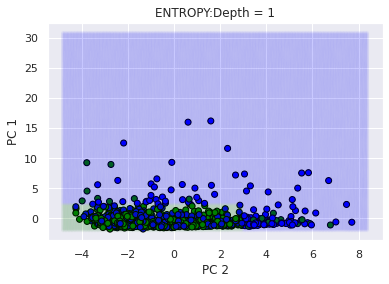

In [463]:
index = data2_acc.index(max(data2_acc))
best_depth2, best_mode2, best_features = data2_depth[index], data2_mode[index], data2_features[index]

if best_features == "PCA":
  X, Y = principalComponentsDataset2, data2['Class'].values.reshape(-1,1)
  ylabel = "PC 1"
  xlabel = "PC 2"
else:
  X, Y = data2[[d2_feat1, d2_feat2]].to_numpy(), data2['Class'].values.reshape(-1,1)
  xlabel = d2_feat1
  ylabel = d2_feat2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)  # First split: 70% train, 30% valid+test

x0v = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 200)
x1v = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T


model = DecisionTree(max_depth=best_depth2, mode = best_mode2)

y_prob = model.fit(X_train, Y_train).predict(X_test)   
accuracy = model.evaluate_acc(y_prob, Y_test, Y_test.shape[0])
acc = f'accuracy: {accuracy*100:.1f}.'
print(acc)

y_prob_all = model.fit(X_train, Y_train).predict(x_all)
cmap = matplotlib.colors.ListedColormap(["green", "blue", "blue"])

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, marker='o', alpha=1, edgecolors="black",cmap=cmap)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.02,cmap=cmap)

plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.title(best_mode2.upper() + ':Depth = ' + str(best_depth2))
plt.show()


# Precision Recall


Given dataset 1 is imbalanced, precision recall is more suited to assess the quality of the model 


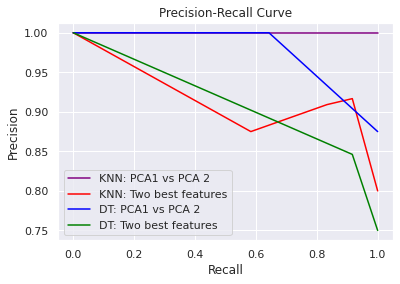

In [464]:
# PCA
x1, y1 = principalComponentsDataset1, data1['Class']
# Two best features
x2, y2 = data1[[d1_feat1, d1_feat2]].to_numpy(), data1['Class']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8)

model1 = KNN(K=best_k1, dist_fn=fn1)
model2 = DecisionTree(max_depth = best_depth1, mode = best_mode1)

y1_train_new, y2_train_new = np.array([int(item) for item in y1_train]), np.array([int(item) for item in y2_train])

y_score1_KNN,_ = model1.fit(x1_train, y1_train_new).predict(x1_test)
y_score1_KNN = y_score1_KNN[:,1]
y_score2_KNN,_ = model1.fit(x2_train, y2_train_new).predict(x2_test)
y_score2_KNN = y_score2_KNN[:,1]

y_score1_DT = model2.fit(x1_train, y1_train.values.reshape(-1,1)).predict(x1_test)
y_score2_DT = model2.fit(x2_train, y2_train.values.reshape(-1,1)).predict(x2_test)

# Why are these initialized??
precision = dict()
recall = dict()
average_precision = dict()

precision1, recall1, _ = precision_recall_curve(y1_test, y_score1_KNN)  # KNN: PCA1 vs PCA 2
precision2, recall2, _ = precision_recall_curve(y2_test, y_score2_KNN)  # KNN: Two best features
precision3, recall3, _ = precision_recall_curve(y1_test, y_score1_DT)   # DT: PCA1 vs PCA 2
precision4, recall4, _ = precision_recall_curve(y2_test, y_score2_DT)   # DT: Two best features

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall1, precision1, color='purple', label = "KNN: PCA1 vs PCA 2")
ax.plot(recall2, precision2, color='red', label = "KNN: Two best features")
ax.plot(recall3, precision3, color='blue', label = "DT: PCA1 vs PCA 2")
ax.plot(recall4, precision4, color='green', label = "DT: Two best features")

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='best')
plt.show()

# ROC

Given dataset 2 is relatively balanced, it is more accurate to use ROC 


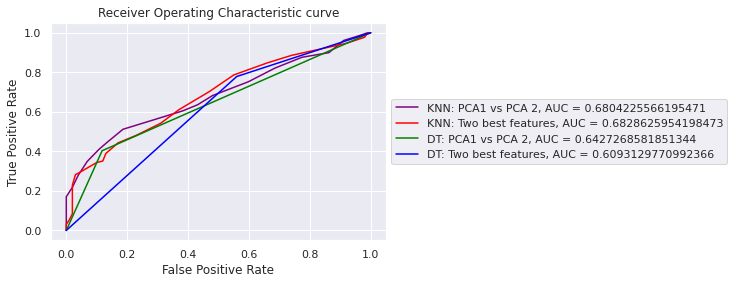

In [465]:
# PCA
x1, y1 = principalComponentsDataset2, data2['Class']
# Two best features
x2, y2 = data2[[d2_feat1, d2_feat2]].to_numpy(), data2['Class']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8)

model1 = KNN(K=best_k2, dist_fn=fn2)
model2 = DecisionTree(max_depth=best_depth2, mode = best_mode2) # Default Settings

y1_train_new, y2_train_new = np.array([int(item) for item in y1_train]), np.array([int(item) for item in y2_train])

y_score1_KNN,_ = model1.fit(x1_train, y1_train_new).predict(x1_test)
y_score1_KNN = y_score1_KNN[:,1]
y_score2_KNN,_ = model1.fit(x2_train, y2_train_new).predict(x2_test)
y_score2_KNN = y_score2_KNN[:,1]

y_score1_DT = model2.fit(x1_train, y1_train.values.reshape(-1,1)).predict(x1_test)
y_score2_DT = model2.fit(x2_train, y2_train.values.reshape(-1,1)).predict(x2_test)

fpr1, tpr1, _ = metrics.roc_curve(y1_test,  y_score1_KNN)
fpr2, tpr2, _ = metrics.roc_curve(y2_test,  y_score2_KNN)
fpr3, tpr3, _ = metrics.roc_curve(y1_test,  y_score1_DT)
fpr4, tpr4, _ = metrics.roc_curve(y2_test,  y_score2_DT)

# Get Area Under Curve
auc1 = metrics.roc_auc_score(y1_test, y_score1_KNN)
auc2 = metrics.roc_auc_score(y2_test, y_score2_KNN)
auc3 = metrics.roc_auc_score(y1_test, y_score1_DT)
auc4 = metrics.roc_auc_score(y2_test, y_score2_DT)

fig, ax = plt.subplots()
ax.plot(fpr1,tpr1, color = "purple", label = "KNN: PCA1 vs PCA 2, AUC = "+str(auc1))
ax.plot(fpr2,tpr2, color = "red", label = "KNN: Two best features, AUC = "+str(auc2))
ax.plot(fpr3,tpr3,color = "green", label = "DT: PCA1 vs PCA 2, AUC = "+str(auc3))
ax.plot(fpr4,tpr4, color ="blue", label = "DT: Two best features, AUC = "+str(auc4))
ax.set_title("Receiver Operating Characteristic curve")
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# **Accuracy Comparison**

For Dataset 1, we can see that even though both DT and KNN gave accurate predictions, KNN still obtained a higher accuracy.

The same can be said for Dataset 2, where both methods gave an accuracy of roughly 0.6, but KNN still tops DT by a small amount. 